In [41]:

import numpy as np 
import pandas as pd


import matplotlib as mpl
import matplotlib.pyplot as plt   
import seaborn as sns           
import os

In [42]:
import os
import pandas as pd


df_0 = pd.read_csv('data\\prices_round_2_day_-1.csv', sep=';')
df_1 = pd.read_csv('data\\prices_round_2_day_0.csv', sep=';')
df_2 = pd.read_csv('data\\prices_round_2_day_1.csv', sep=';')

# Adjusting the timestamp for each DataFrame
for i, df in enumerate([df_0, df_1, df_2]):
    df['timestamp'] = df['timestamp'] / 100 + i * 10000

# Concatenating df_0 and df_1
df_concatenated = pd.concat([df_0, df_1], ignore_index=True)  # Resetting index

# Concatenating with df_2
orchids_df = pd.concat([df_concatenated, df_2], ignore_index=True)  # Resetting index

orchids_df.set_index('timestamp', inplace=True)  # Setting 'timestamp' as index


In [43]:
orchids_df

,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
timestamp,,,,,,,
0.0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
1.0,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
2.0,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
3.0,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
4.0,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1
...,...,...,...,...,...,...,...
29996.0,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1
29997.0,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1
29998.0,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1


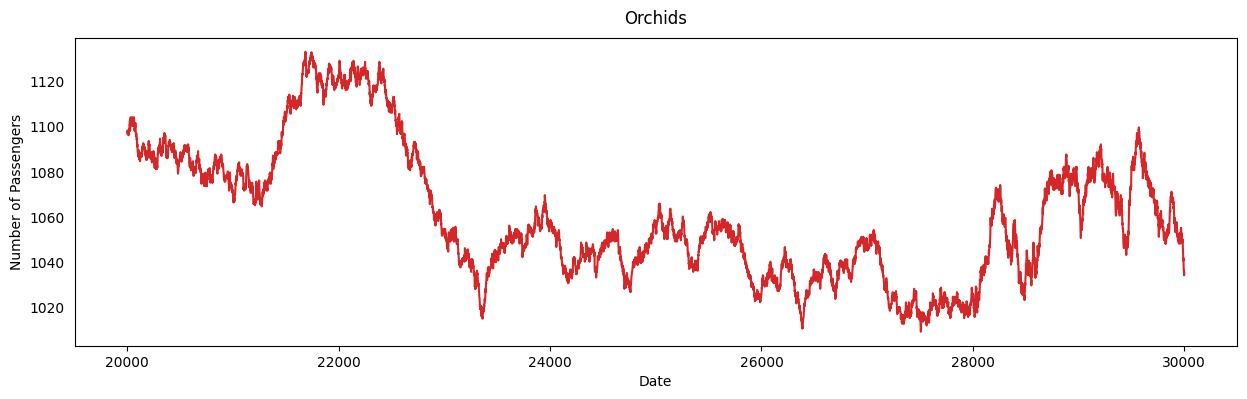

In [44]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['timestamp'], y=df['ORCHIDS'], title='Orchids')

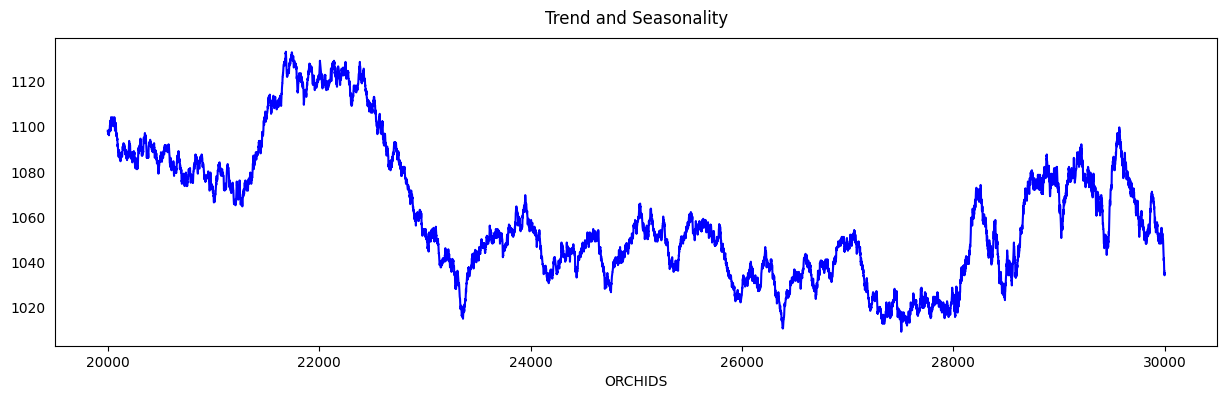

In [45]:
#Base Level
#Trend 
#Seasonality
#Error

def plot_df(df, x, y, title="", xlabel='ORCHIDS', ylabel='', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['timestamp'], y=df['ORCHIDS'], title='Trend and Seasonality')

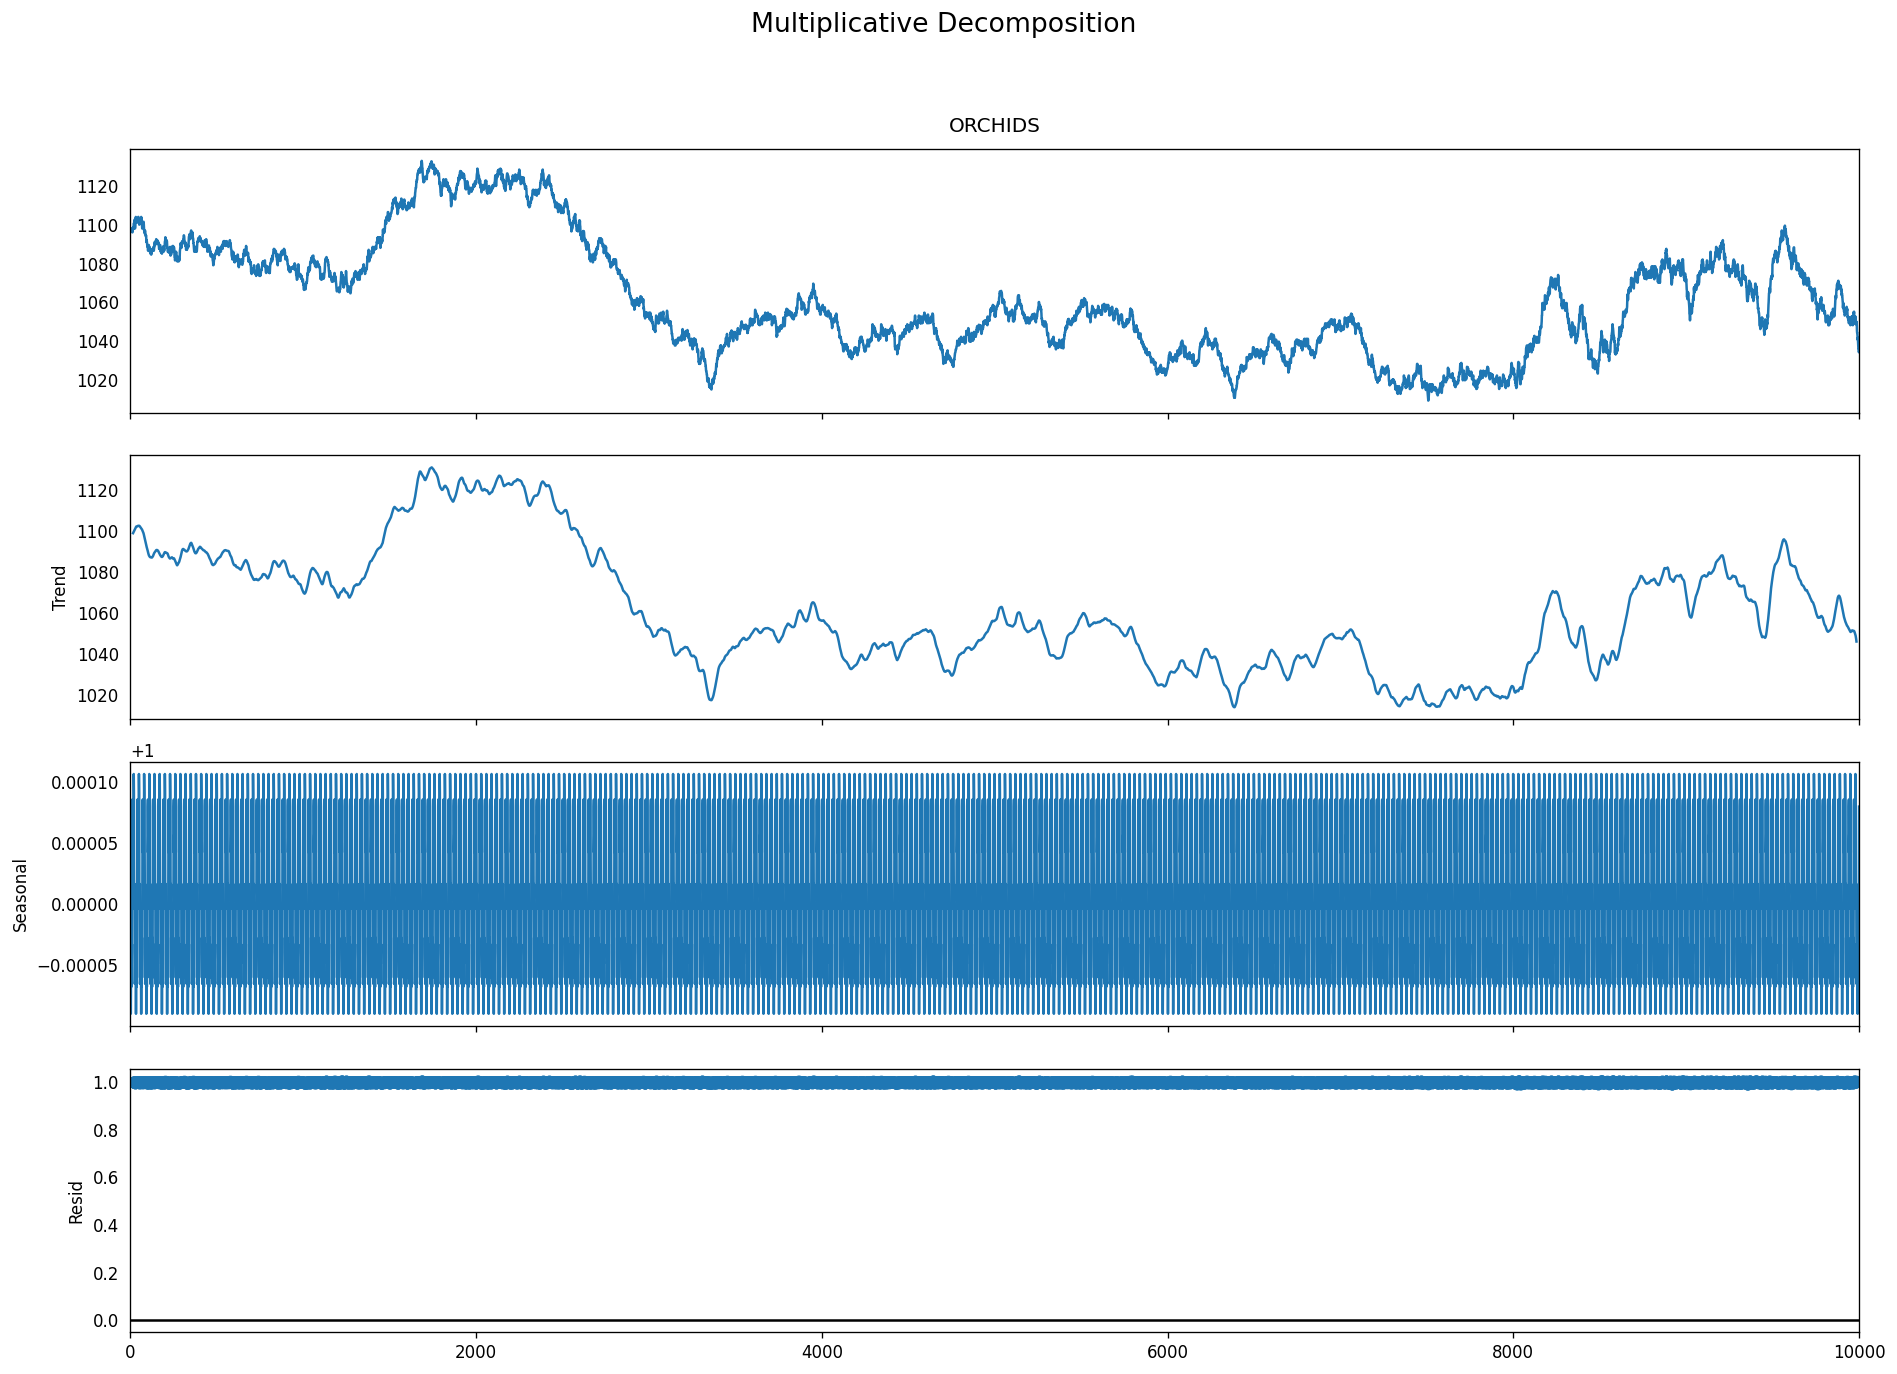

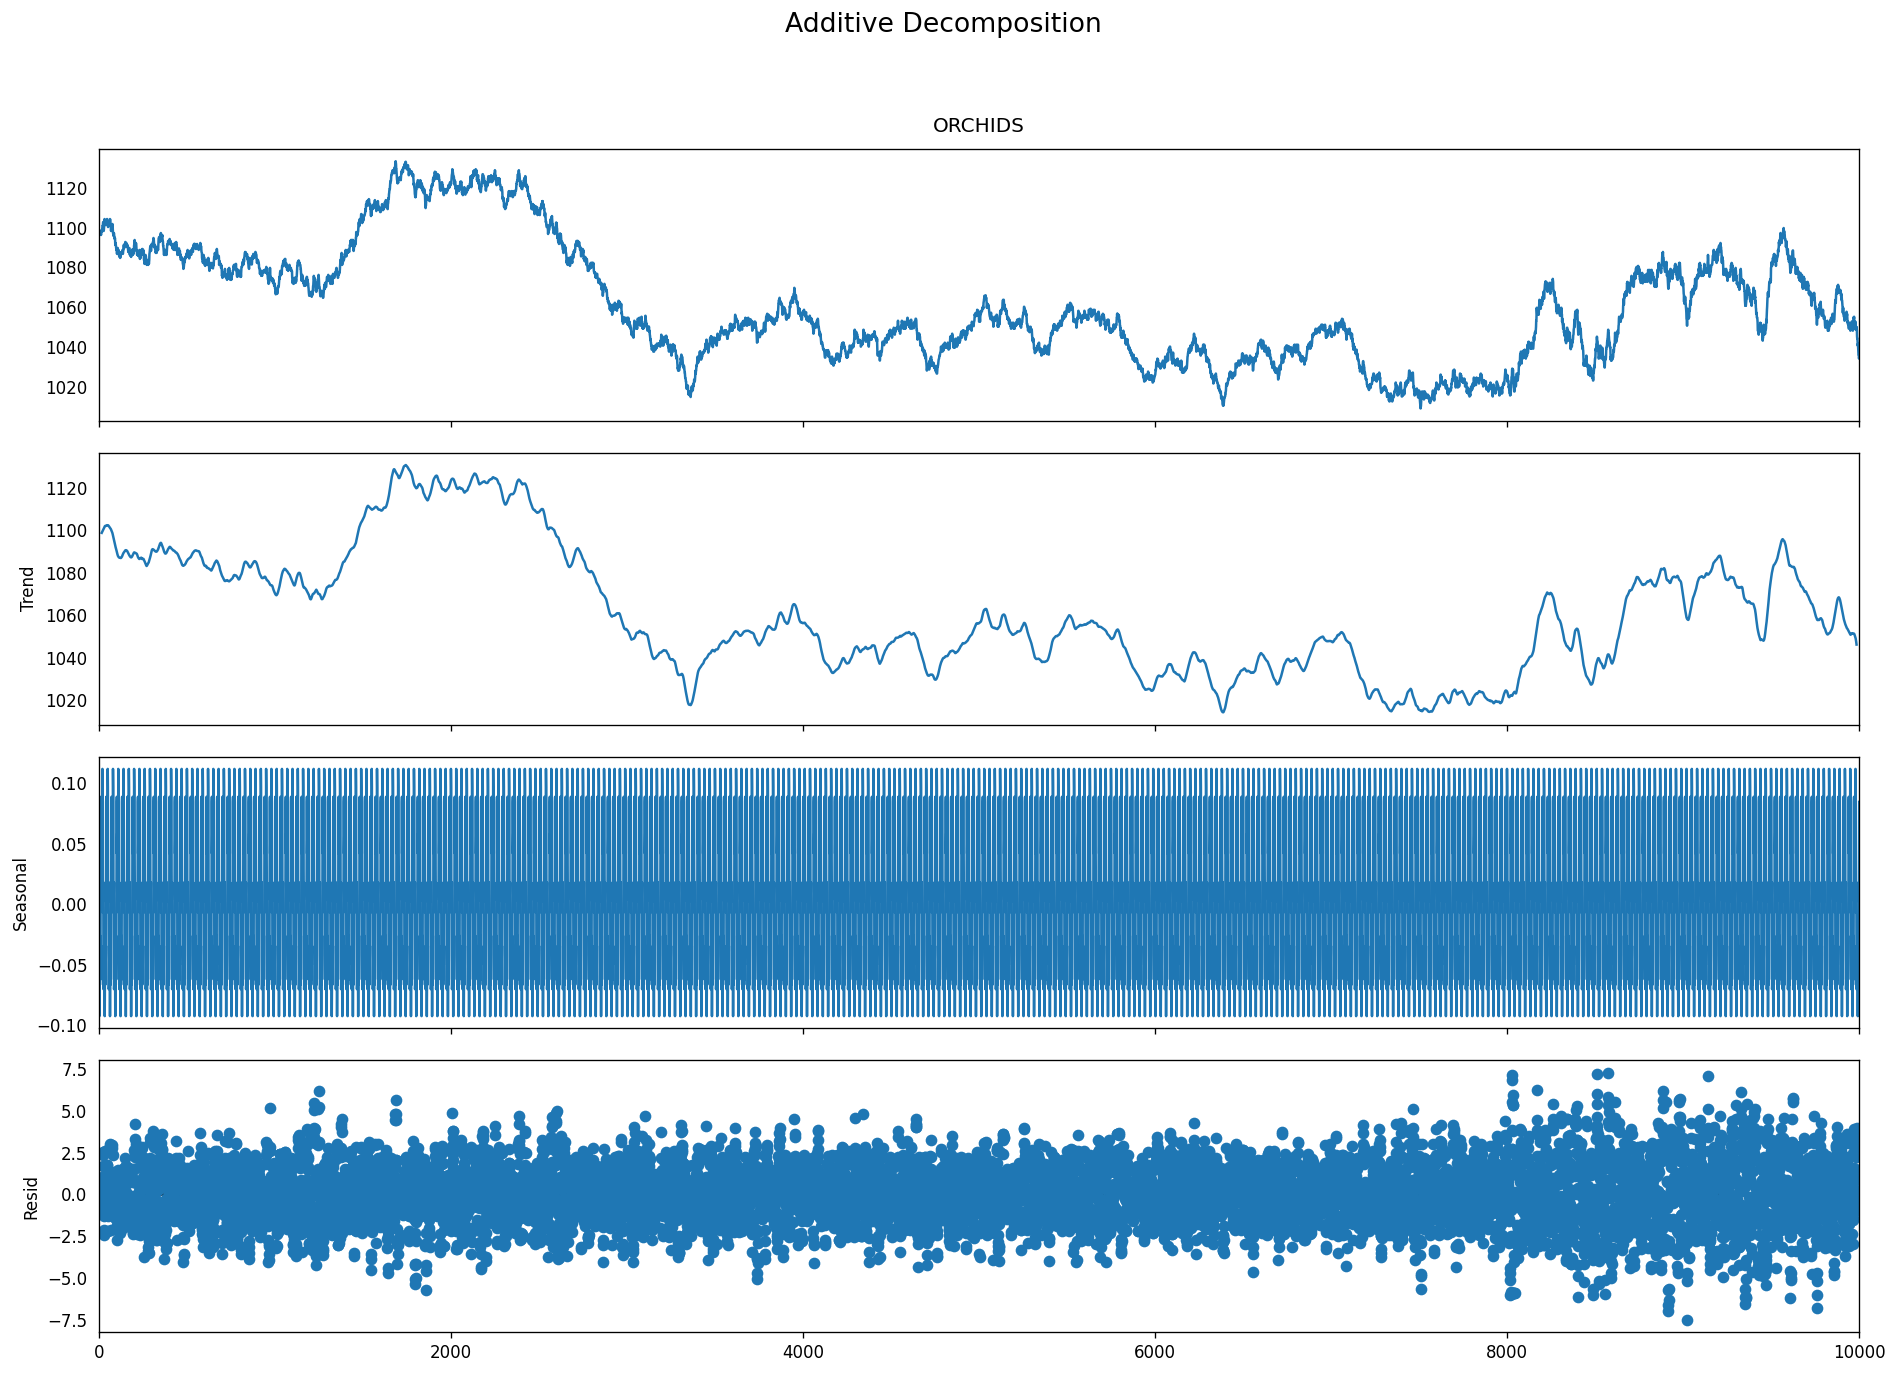

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['ORCHIDS'], model='multiplicative', period=30)

additive_decomposition = seasonal_decompose(df['ORCHIDS'], model='additive', period=30)
# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Text(0.5, 1.0, ' detrended')

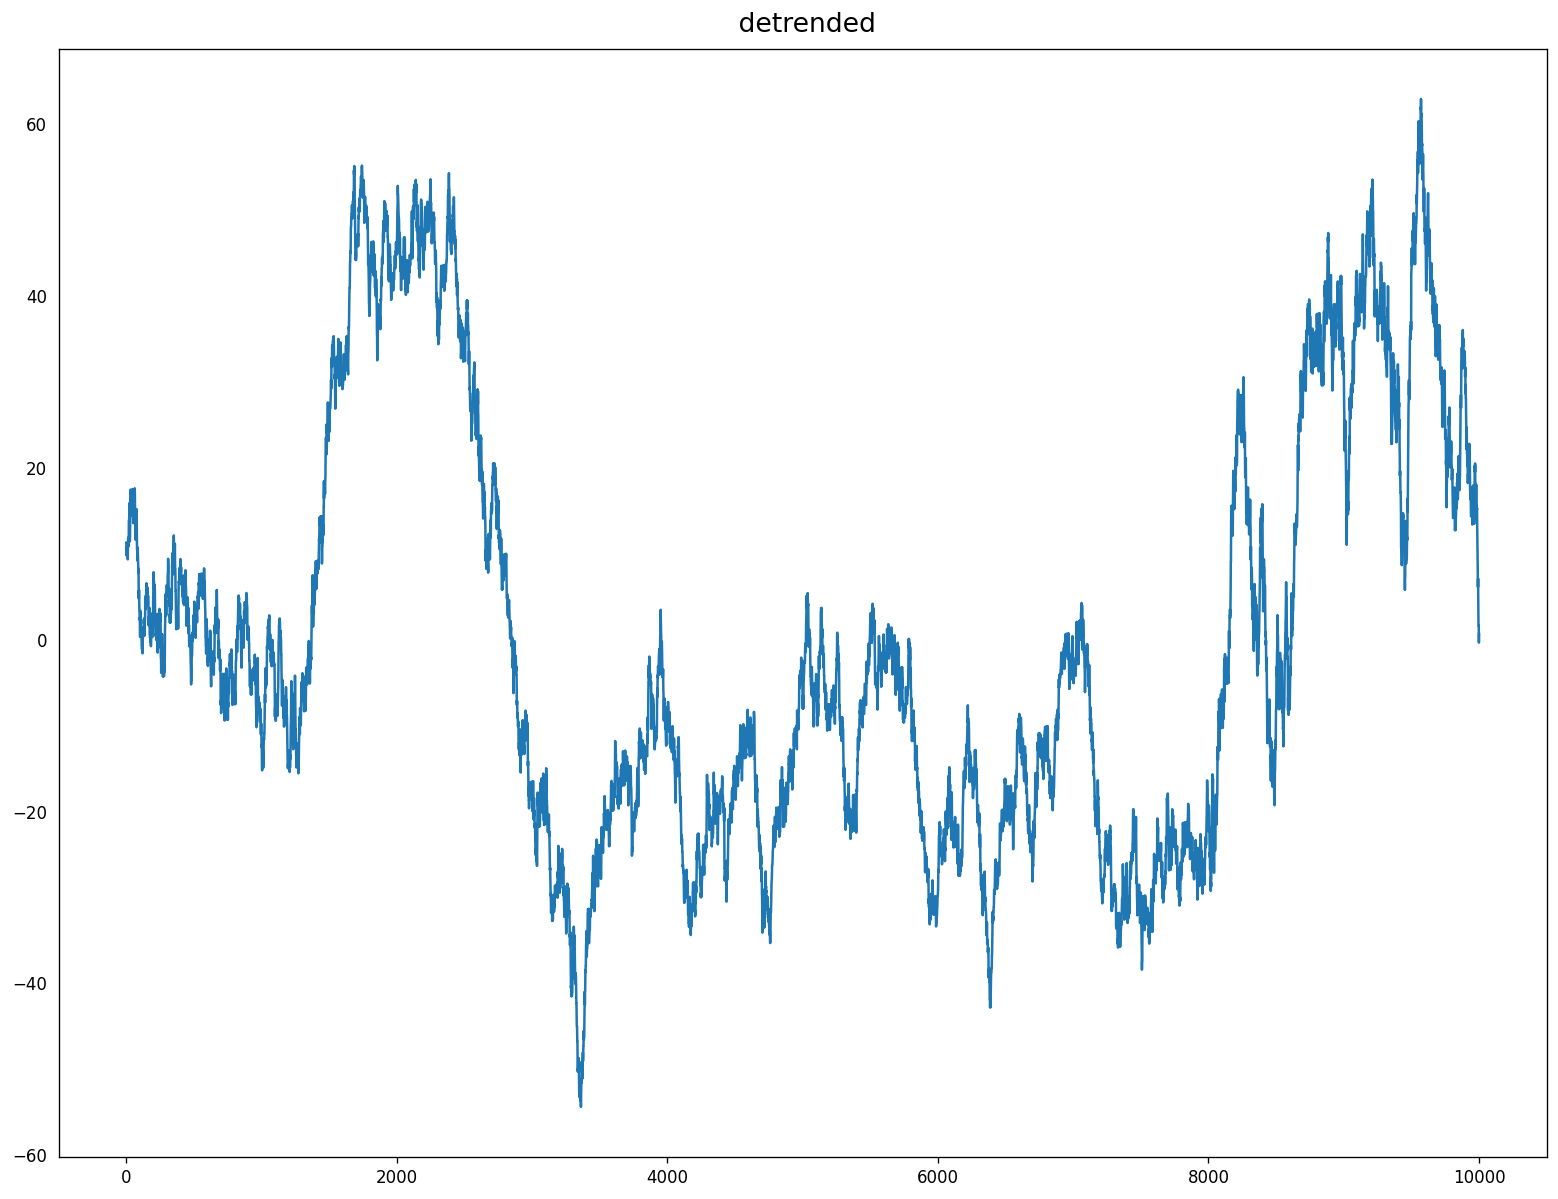

In [47]:

from scipy import signal
detrended = signal.detrend(df['ORCHIDS'].values)
plt.plot(detrended)
plt.title(' detrended', fontsize=16)

Text(0.5, 1.0, 'ORCHIDS additive detrend')

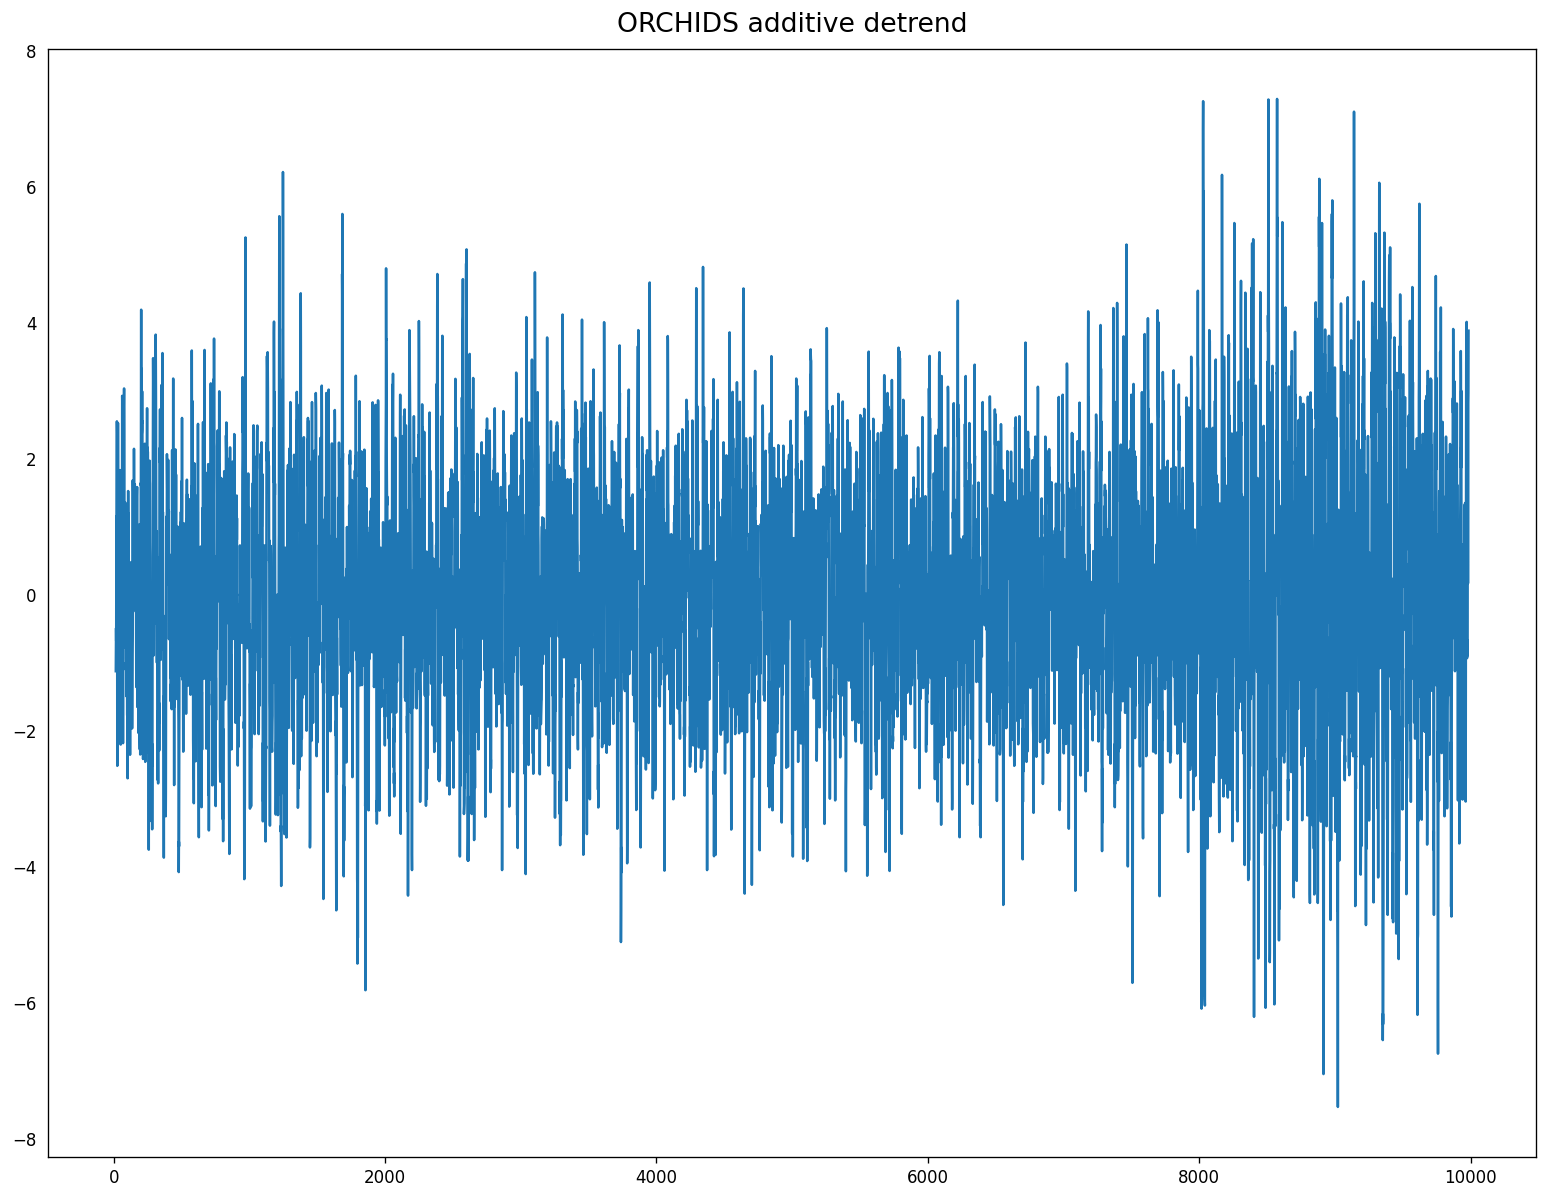

In [48]:

from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['ORCHIDS'], model='additive', period=30)
detrended = df['ORCHIDS'].values - result_mul.trend
plt.plot(detrended)
plt.title('ORCHIDS additive detrend', fontsize=16)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

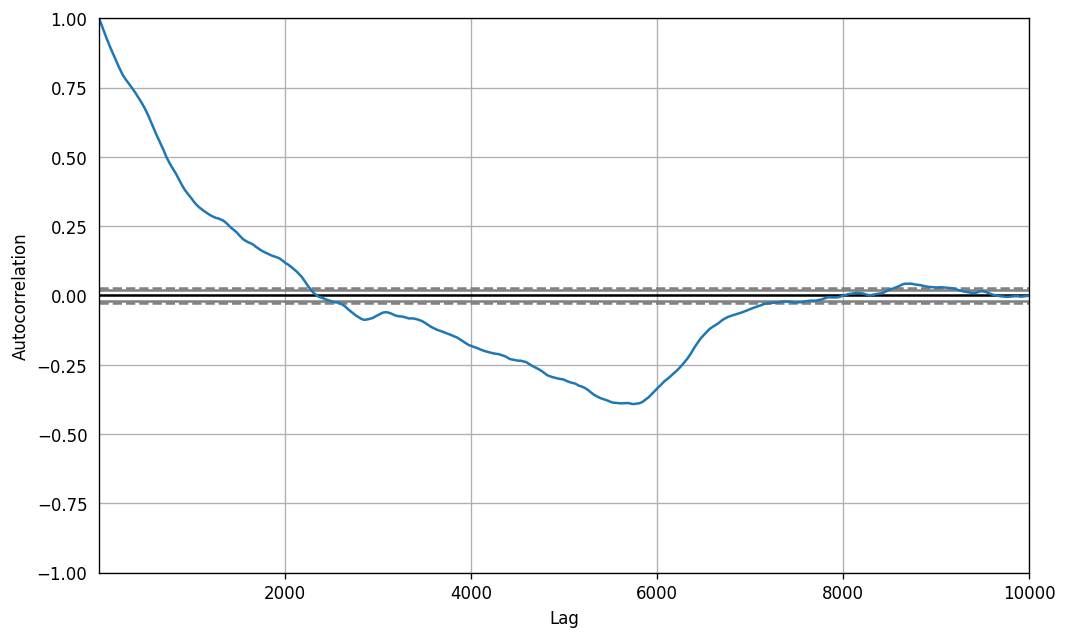

In [49]:

from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['ORCHIDS'].tolist())

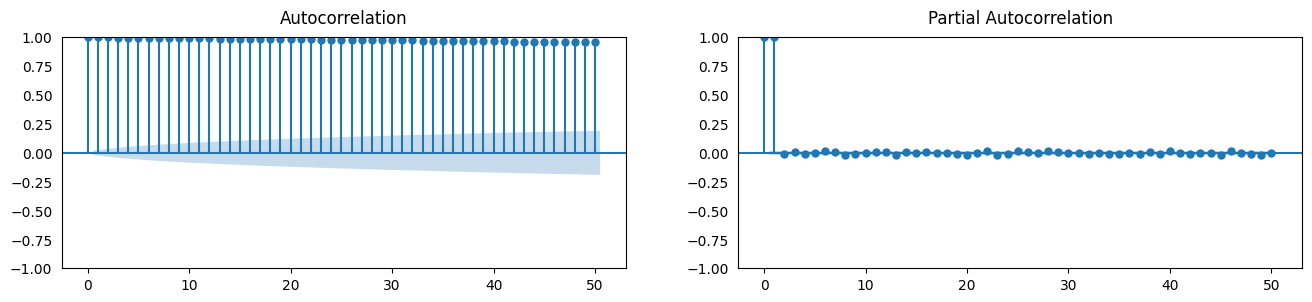

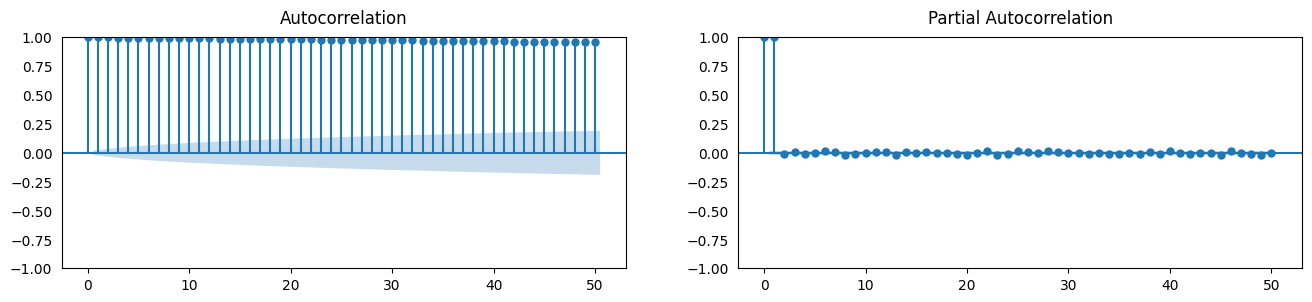

In [50]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['ORCHIDS'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['ORCHIDS'].tolist(), lags=50, ax=axes[1])

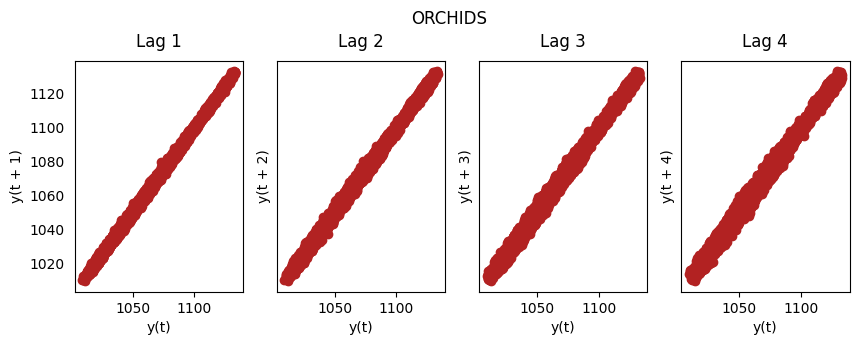

In [51]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['ORCHIDS'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('ORCHIDS', y=1.05)    
plt.show()

In [52]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df[['ORCHIDS', 'timestamp']], maxlag=10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0059  , p=0.3159  , df_denom=9997, df_num=1
ssr based chi2 test:   chi2=1.0062  , p=0.3158  , df=1
likelihood ratio test: chi2=1.0062  , p=0.3158  , df=1
parameter F test:         F=1.0059  , p=0.3159  , df_denom=9997, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5174  , p=0.5961  , df_denom=9995, df_num=2
ssr based chi2 test:   chi2=1.0351  , p=0.5960  , df=2
likelihood ratio test: chi2=1.0351  , p=0.5960  , df=2
parameter F test:         F=2.5447  , p=0.0785  , df_denom=9995, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3547  , p=0.7858  , df_denom=9993, df_num=3
ssr based chi2 test:   chi2=1.0645  , p=0.7856  , df=3
likelihood ratio test: chi2=1.0645  , p=0.7857  , df=3
parameter F test:         F=2.5181  , p=0.0807  , df_denom=9993, df_num=2

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2719  , p=0.

c:\Users\marti\venv\pmc\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
c:\Users\marti\venv\pmc\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
c:\Users\marti\venv\pmc\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 2
  warnings.warn('covariance of constraints does not have full '
c:\Users\marti\venv\pmc\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 2
  warnings.warn('covariance of constraints does not have full '
c:\U

{1: ({'ssr_ftest': (1.0059095962009525, 0.31590904638673845, 9997.0, 1),
   'ssr_chi2test': (1.006211459638844, 0.3158121699140744, 1),
   'lrtest': (1.0061608399446413, 0.3158243429770654, 1),
   'params_ftest': (1.0059095962069002, 0.3159090463852042, 9997.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.5173675093165355, 0.5961036421190969, 9995.0, 2),
   'ssr_chi2test': (1.0351491196910532, 0.5959642721053888, 2),
   'lrtest': (1.035095541337796, 0.5959802377113903, 2),
   'params_ftest': (2.5447353748604655, 0.0785446753801074, 9995.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.3546648014022939, 0.7857731286331378, 9993.0, 3),
   'ssr_chi2test': (1.0645267740678879, 0.7856436142844446, 3),
   'lrtest': (1.0644701058954524, 0.7856573126542999, 3),
   'params_ftest': (2.518149781746615, 0.08065976178646243, 9993.0, 2)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0

In [53]:
df.corr()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
timestamp,1.000000,-0.519585,-0.244891,-0.045672,0.195793,0.691903,-0.583855,NaN
ORCHIDS,-0.519585,1.000000,0.626956,0.285203,-0.177622,-0.410192,0.622763,NaN
TRANSPORT_FEES,-0.244891,0.626956,1.000000,0.354680,-0.181961,-0.215758,0.690930,NaN
EXPORT_TARIFF,-0.045672,0.285203,0.354680,1.000000,-0.155385,-0.251020,0.277598,NaN
IMPORT_TARIFF,0.195793,-0.177622,-0.181961,-0.155385,1.000000,0.452322,-0.155168,NaN
SUNLIGHT,0.691903,-0.410192,-0.215758,-0.251020,0.452322,1.000000,-0.262965,NaN
HUMIDITY,-0.583855,0.622763,0.690930,0.277598,-0.155168,-0.262965,1.000000,NaN
DAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


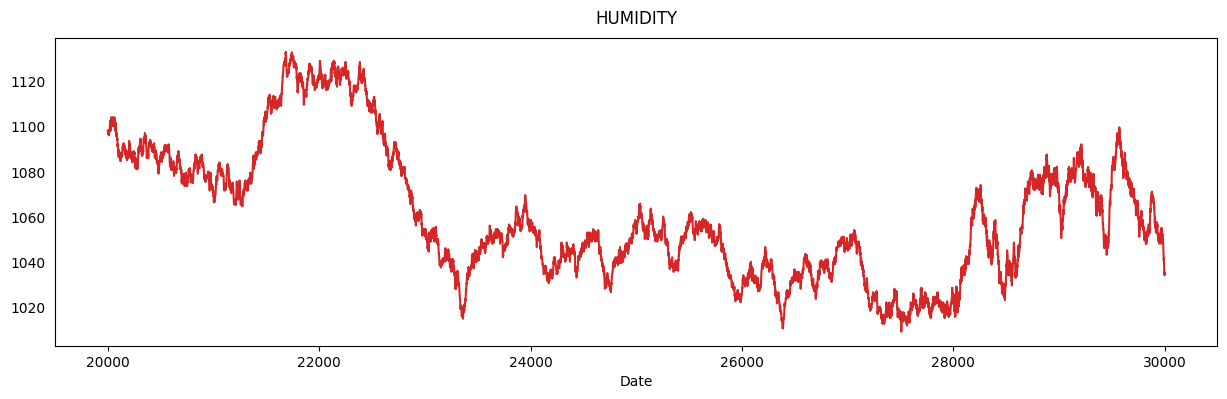

In [54]:
#positively correlated com transport_fees e export_tarif , transport fees higher influence, fazer dickey-fueler test
#negatively correlated com sunlight positively correlated com humidity, humidity melhor para criar sinal de entrada
#sunlight e humidity negatively correlated makes sense

def plot_df(df, x, y, title="", xlabel='Date', ylabel='', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['timestamp'], y=df['ORCHIDS'], title='HUMIDITY')

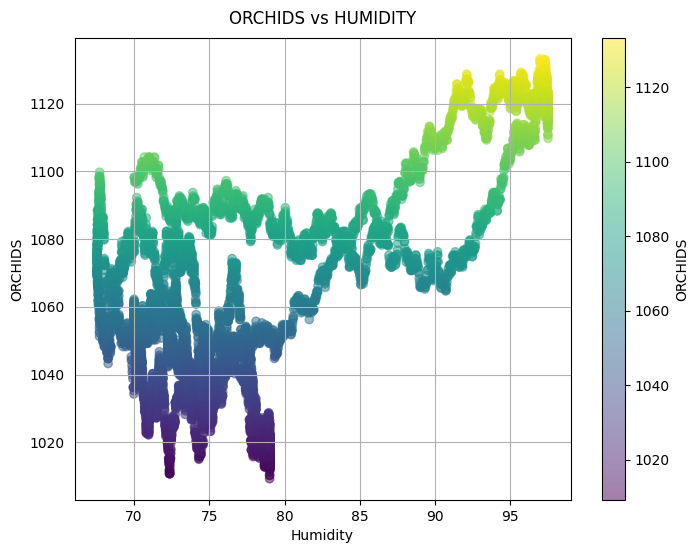

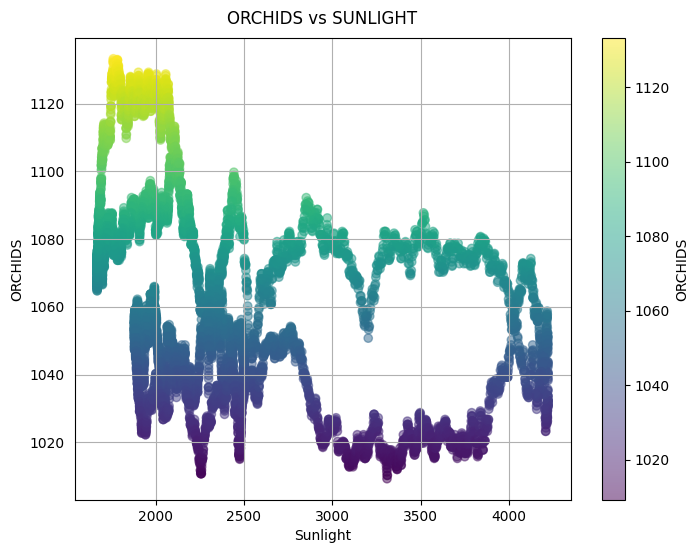

In [55]:
import matplotlib.pyplot as plt

def plot_df(df, x, y, title="", xlabel='', ylabel='', dpi=100):
    plt.figure(figsize=(8, 6), dpi=dpi)
    plt.scatter(x, y, c=df['ORCHIDS'], cmap='viridis', alpha=0.5)
    plt.colorbar(label='ORCHIDS')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Plot ORCHIDS against HUMIDITY with color indicating ORCHIDS values
plot_df(df, x=df['HUMIDITY'], y=df['ORCHIDS'], title='ORCHIDS vs HUMIDITY', xlabel='Humidity', ylabel='ORCHIDS')

# Plot ORCHIDS against SUNLIGHT with color indicating ORCHIDS values
plot_df(df, x=df['SUNLIGHT'], y=df['ORCHIDS'], title='ORCHIDS vs SUNLIGHT', xlabel='Sunlight', ylabel='ORCHIDS')


In [56]:
df['HUMIDITY'].mean()
df['SUNLIGHT'].mean()

2431.936380991901

In [57]:
# Seasonality Analysis
sunlight_intervals = pd.cut(df['SUNLIGHT'], bins=3)  
humidity_intervals = pd.cut(df['HUMIDITY'], bins=3)  


In [58]:
orchid_seasonality = df.groupby([sunlight_intervals, humidity_intervals])['ORCHIDS'].mean().unstack()

C:\Users\marti\AppData\Local\Temp\ipykernel_30396\3641940950.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orchid_seasonality = df.groupby([sunlight_intervals, humidity_intervals])['ORCHIDS'].mean().unstack()


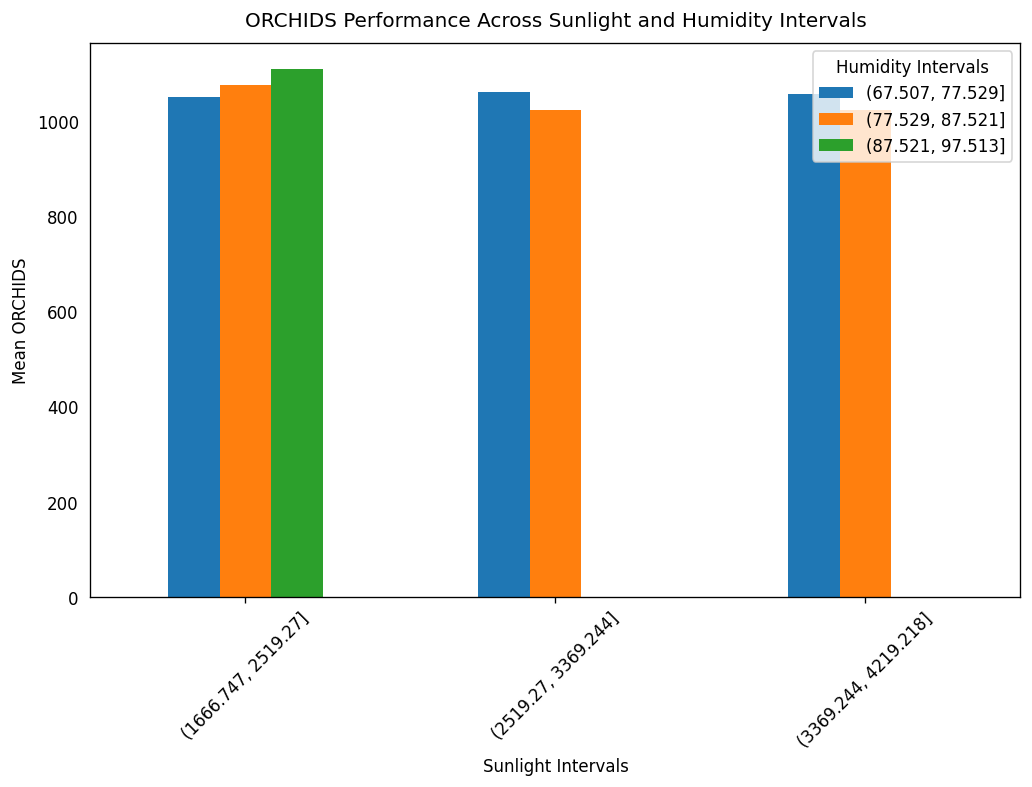

In [59]:
# Visualize seasonality
orchid_seasonality.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Sunlight Intervals')
plt.ylabel('Mean ORCHIDS')
plt.title('ORCHIDS Performance Across Sunlight and Humidity Intervals')
plt.xticks(rotation=45)
plt.legend(title='Humidity Intervals')
plt.show()

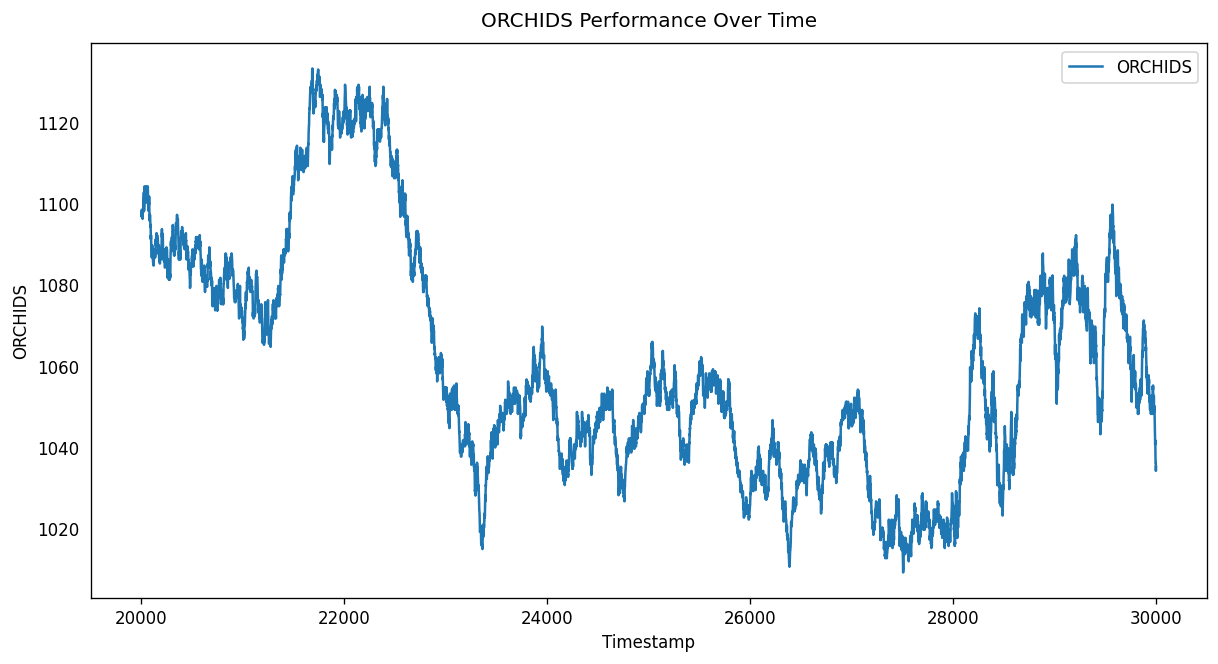

C:\Users\marti\AppData\Local\Temp\ipykernel_30396\4022889982.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orchid_seasonality = df.groupby([sunlight_intervals, humidity_intervals])['ORCHIDS'].mean().unstack()


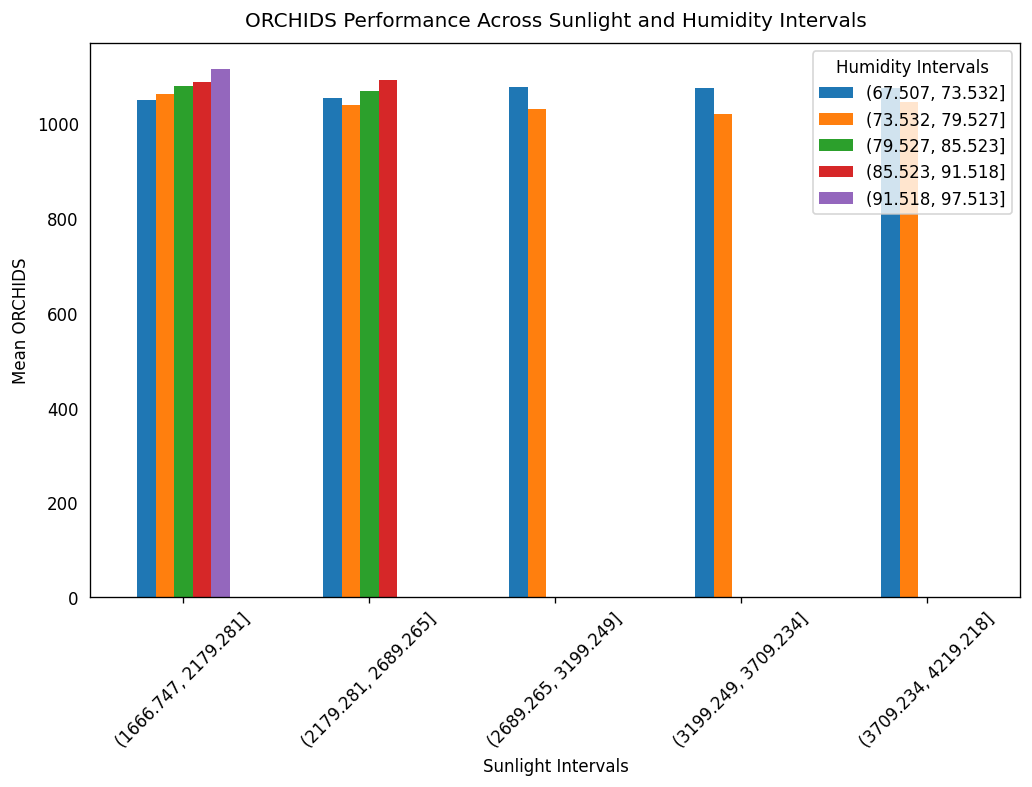

In [60]:


# EDA
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['ORCHIDS'], label='ORCHIDS')
plt.xlabel('Timestamp')
plt.ylabel('ORCHIDS')
plt.title('ORCHIDS Performance Over Time')
plt.legend()
plt.show()

# Seasonality Analysis
sunlight_intervals = pd.cut(df['SUNLIGHT'], bins=5)  # Divide sunlight into 5 intervals
humidity_intervals = pd.cut(df['HUMIDITY'], bins=5)  # Divide humidity into 5 intervals

# Calculate mean ORCHIDS for each interval
orchid_seasonality = df.groupby([sunlight_intervals, humidity_intervals])['ORCHIDS'].mean().unstack()

# Visualize seasonality
orchid_seasonality.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Sunlight Intervals')
plt.ylabel('Mean ORCHIDS')
plt.title('ORCHIDS Performance Across Sunlight and Humidity Intervals')
plt.xticks(rotation=45)
plt.legend(title='Humidity Intervals')
plt.show()


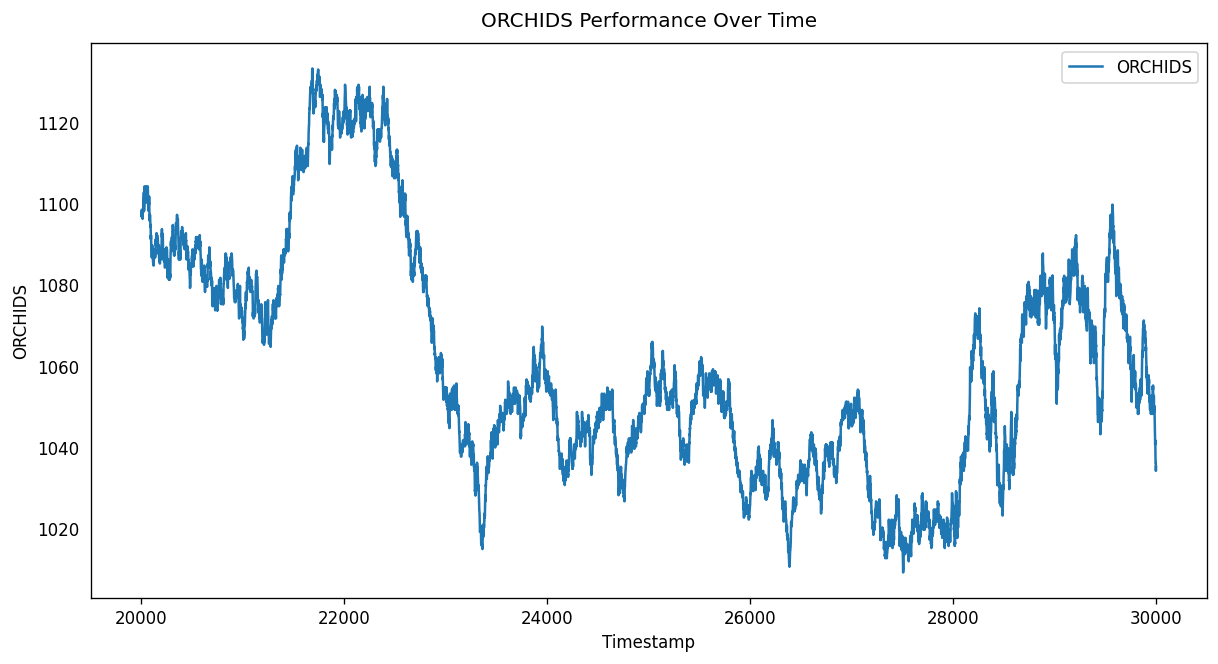

C:\Users\marti\AppData\Local\Temp\ipykernel_30396\2419222103.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orchid_sunlight_seasonality = df.groupby(sunlight_intervals)['ORCHIDS'].mean()


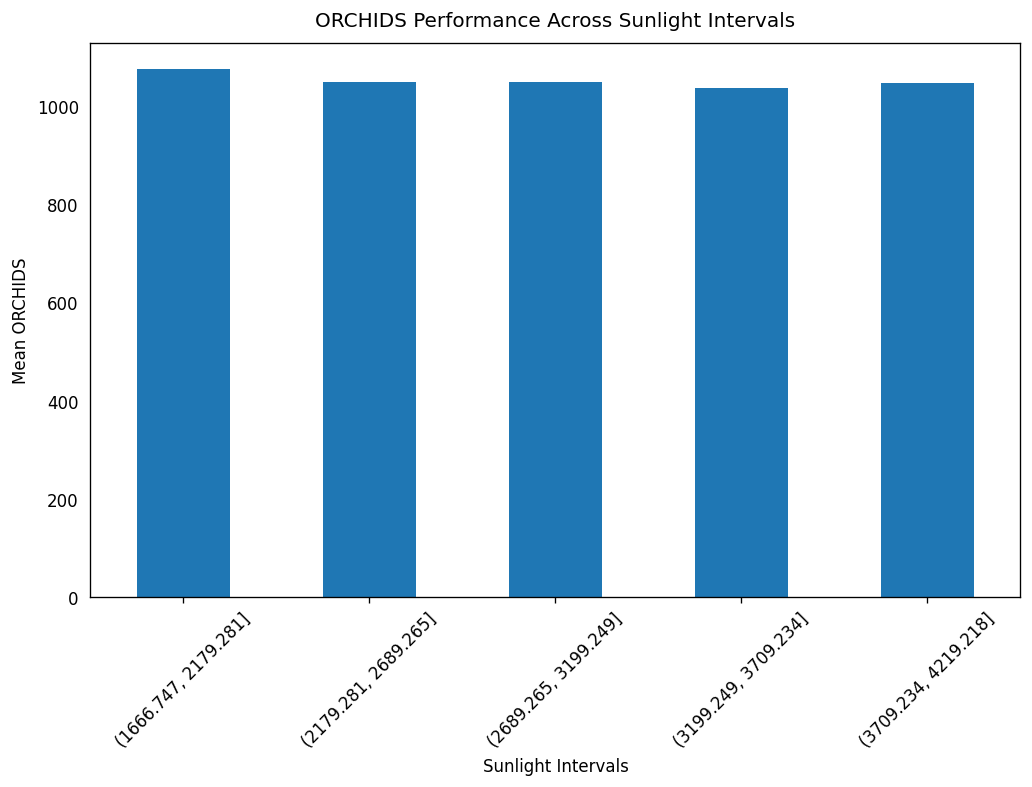

C:\Users\marti\AppData\Local\Temp\ipykernel_30396\2419222103.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orchid_humidity_seasonality = df.groupby(humidity_intervals)['ORCHIDS'].mean()


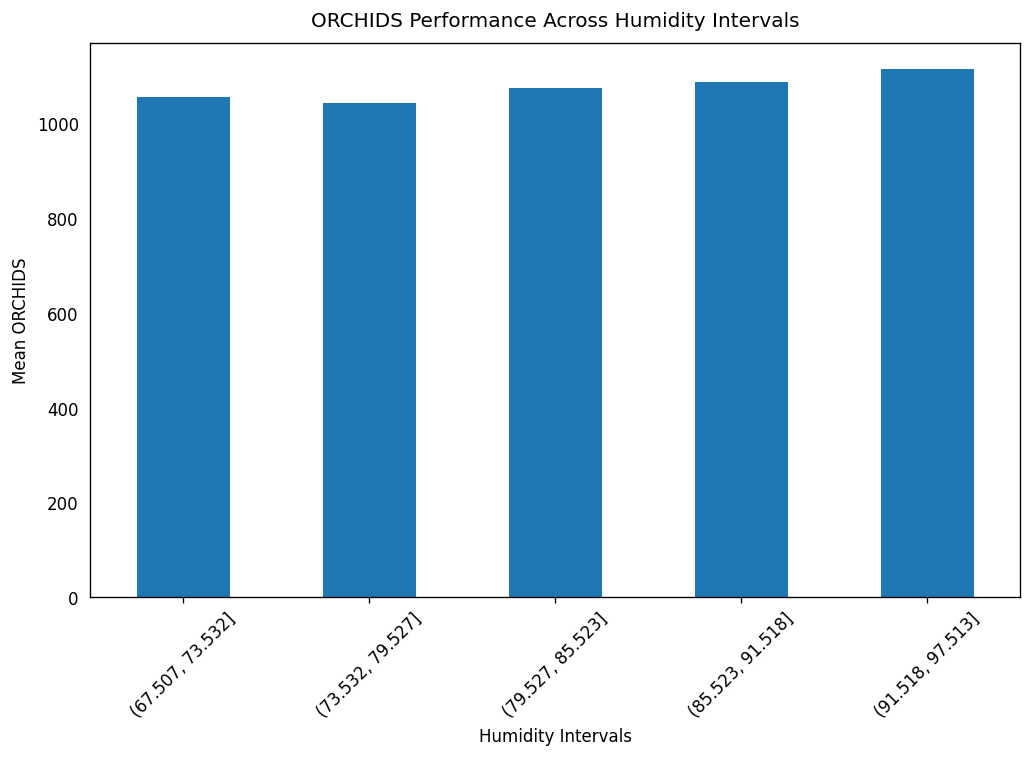

In [61]:


# EDA
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['ORCHIDS'], label='ORCHIDS')
plt.xlabel('Timestamp')
plt.ylabel('ORCHIDS')
plt.title('ORCHIDS Performance Over Time')
plt.legend()
plt.show()

# Seasonality Analysis for SUNLIGHT
sunlight_intervals = pd.cut(df['SUNLIGHT'], bins=5)  # Divide sunlight into 5 intervals

# Calculate mean ORCHIDS for each sunlight interval
orchid_sunlight_seasonality = df.groupby(sunlight_intervals)['ORCHIDS'].mean()

# Visualize seasonality for SUNLIGHT
plt.figure(figsize=(10, 6))
orchid_sunlight_seasonality.plot(kind='bar')
plt.xlabel('Sunlight Intervals')
plt.ylabel('Mean ORCHIDS')
plt.title('ORCHIDS Performance Across Sunlight Intervals')
plt.xticks(rotation=45)
plt.show()

# Seasonality Analysis for HUMIDITY
humidity_intervals = pd.cut(df['HUMIDITY'], bins=5)  # Divide humidity into 5 intervals

# Calculate mean ORCHIDS for each humidity interval
orchid_humidity_seasonality = df.groupby(humidity_intervals)['ORCHIDS'].mean()

# Visualize seasonality for HUMIDITY
plt.figure(figsize=(10, 6))
orchid_humidity_seasonality.plot(kind='bar')
plt.xlabel('Humidity Intervals')
plt.ylabel('Mean ORCHIDS')
plt.title('ORCHIDS Performance Across Humidity Intervals')
plt.xticks(rotation=45)
plt.show()


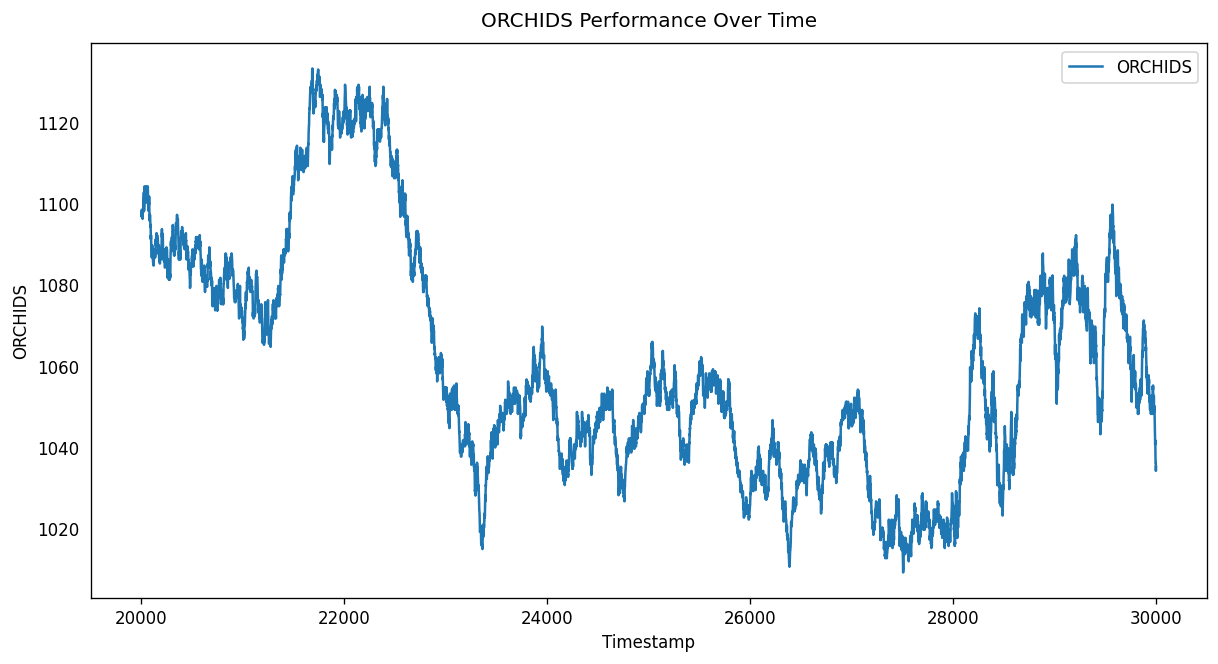

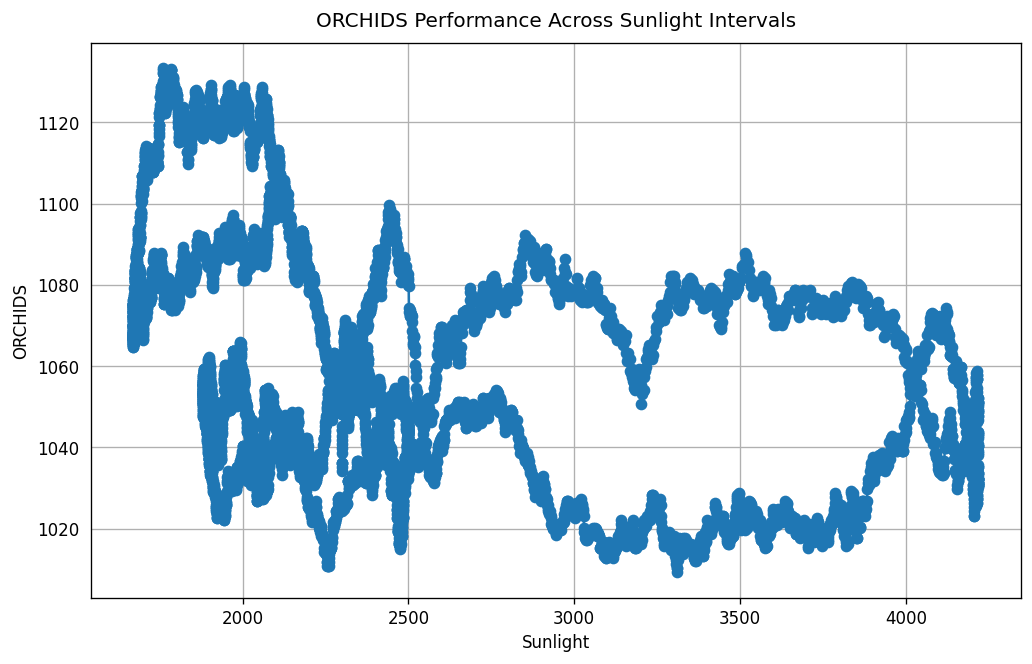

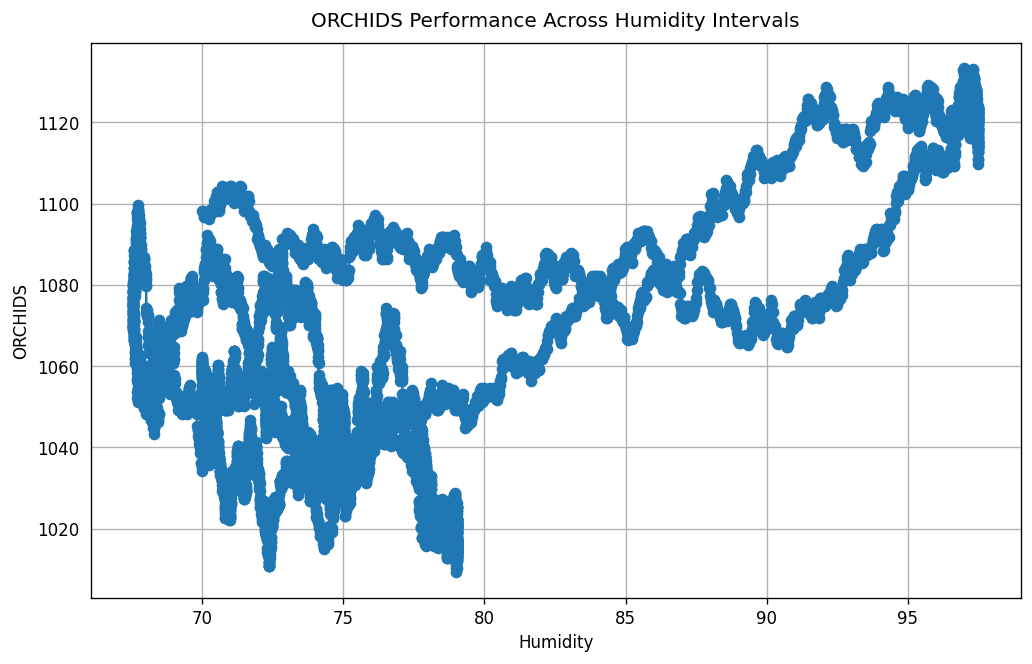

In [62]:

# EDA
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['ORCHIDS'], label='ORCHIDS')
plt.xlabel('Timestamp')
plt.ylabel('ORCHIDS')
plt.title('ORCHIDS Performance Over Time')
plt.legend()
plt.show()

# Seasonality Analysis for SUNLIGHT
plt.figure(figsize=(10, 6))
plt.plot(df['SUNLIGHT'], df['ORCHIDS'], marker='o', linestyle='-')
plt.xlabel('Sunlight')
plt.ylabel('ORCHIDS')
plt.title('ORCHIDS Performance Across Sunlight Intervals')
plt.grid(True)
plt.show()

# Seasonality Analysis for HUMIDITY
plt.figure(figsize=(10, 6))
plt.plot(df['HUMIDITY'], df['ORCHIDS'], marker='o', linestyle='-')
plt.xlabel('Humidity')
plt.ylabel('ORCHIDS')
plt.title('ORCHIDS Performance Across Humidity Intervals')
plt.grid(True)
plt.show()

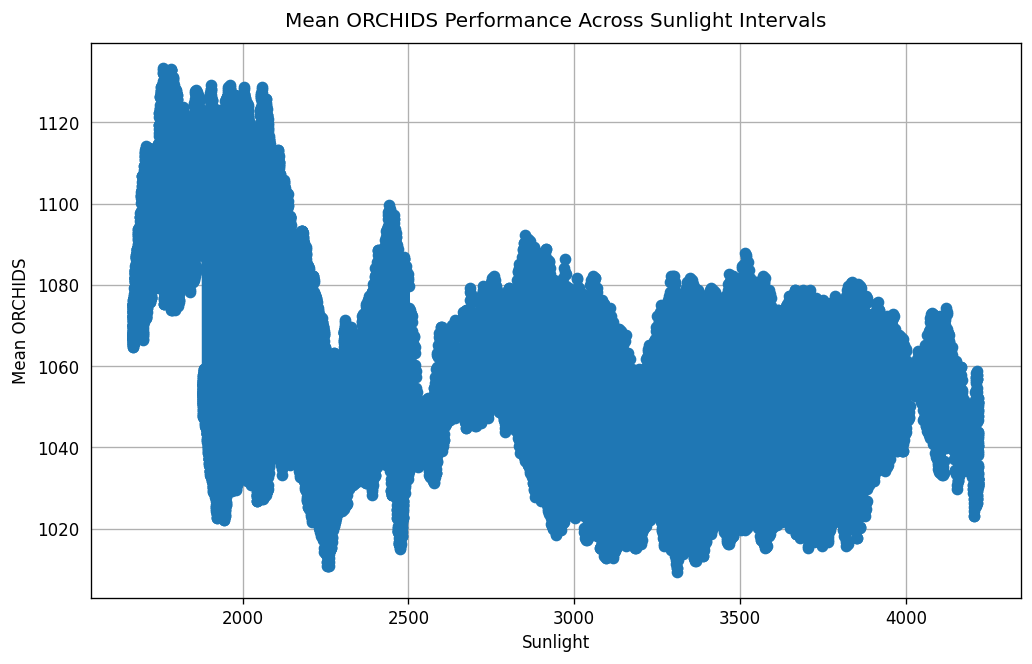

In [63]:

# Aggregate data by taking the mean of ORCHIDS for each unique SUNLIGHT value
sunlight_orchid_mean = df.groupby('SUNLIGHT')['ORCHIDS'].mean()

# Plot aggregated data
plt.figure(figsize=(10, 6))
plt.plot(sunlight_orchid_mean.index, sunlight_orchid_mean.values, marker='o', linestyle='-')
plt.xlabel('Sunlight')
plt.ylabel('Mean ORCHIDS')
plt.title('Mean ORCHIDS Performance Across Sunlight Intervals')
plt.grid(True)
plt.show()

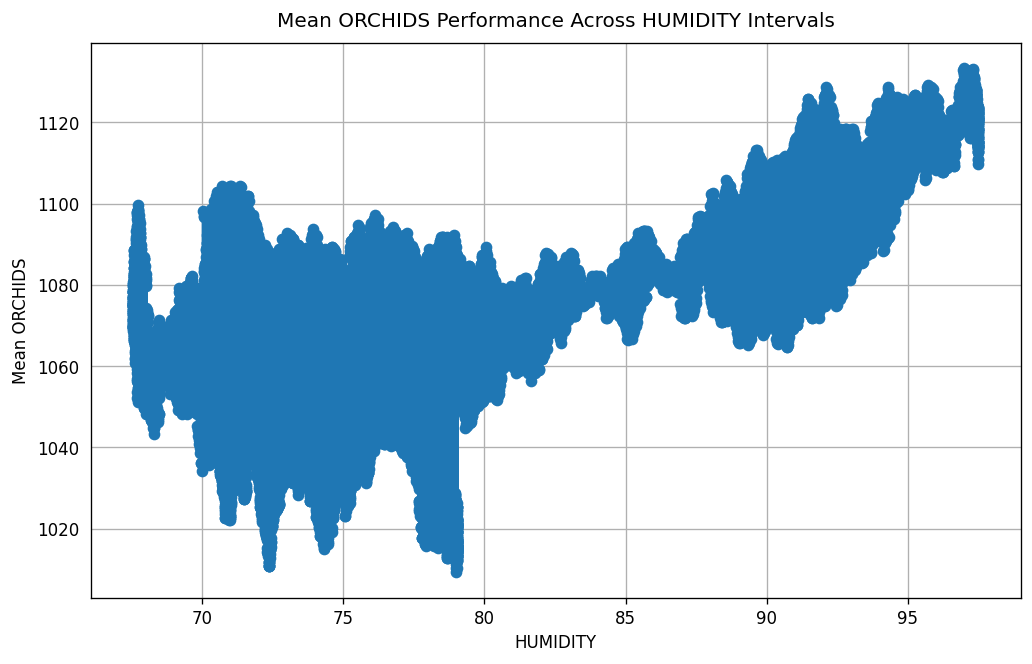

In [64]:

# Aggregate data by taking the mean of ORCHIDS for each unique SUNLIGHT value
sunlight_orchid_mean = df.groupby('HUMIDITY')['ORCHIDS'].mean()

# Plot aggregated data
plt.figure(figsize=(10, 6))
plt.plot(sunlight_orchid_mean.index, sunlight_orchid_mean.values, marker='o', linestyle='-')
plt.xlabel('HUMIDITY')
plt.ylabel('Mean ORCHIDS')
plt.title('Mean ORCHIDS Performance Across HUMIDITY Intervals')
plt.grid(True)
plt.show()

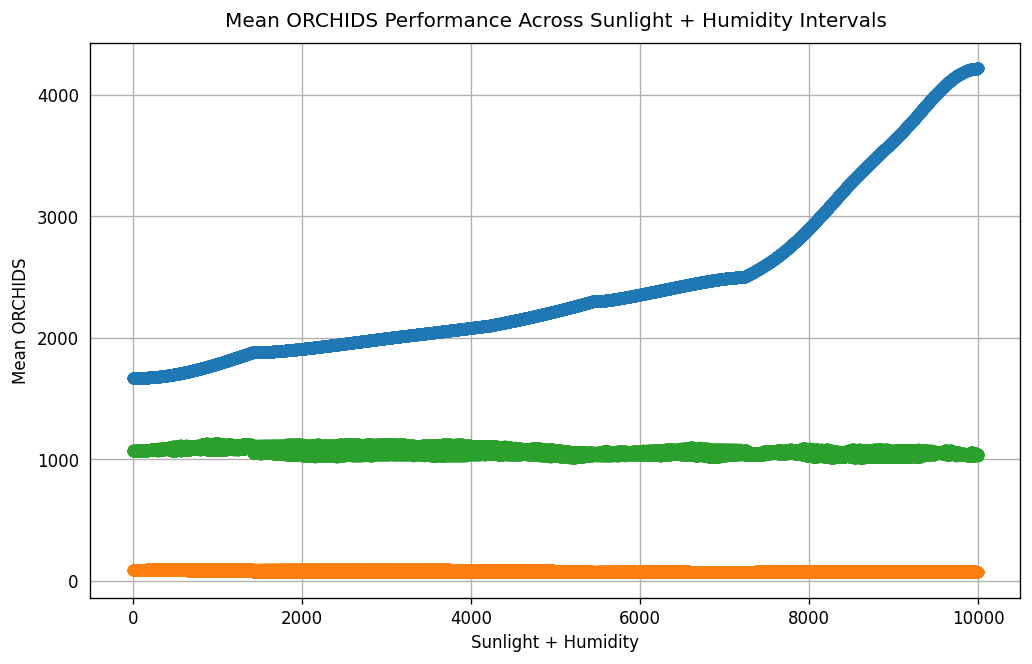

In [67]:
# Aggregate data by taking the mean of ORCHIDS for each unique SUNLIGHT_HUMIDITY value
sunlight_humidity_orchid_mean = df.groupby(['SUNLIGHT', 'HUMIDITY'])['ORCHIDS'].mean().reset_index()

# Plot aggregated data
plt.figure(figsize=(10, 6))
plt.plot(sunlight_humidity_orchid_mean.values, marker='o', linestyle='-')
plt.xlabel('Sunlight + Humidity')
plt.ylabel('Mean ORCHIDS')
plt.title('Mean ORCHIDS Performance Across Sunlight + Humidity Intervals')
plt.grid(True)
plt.show()

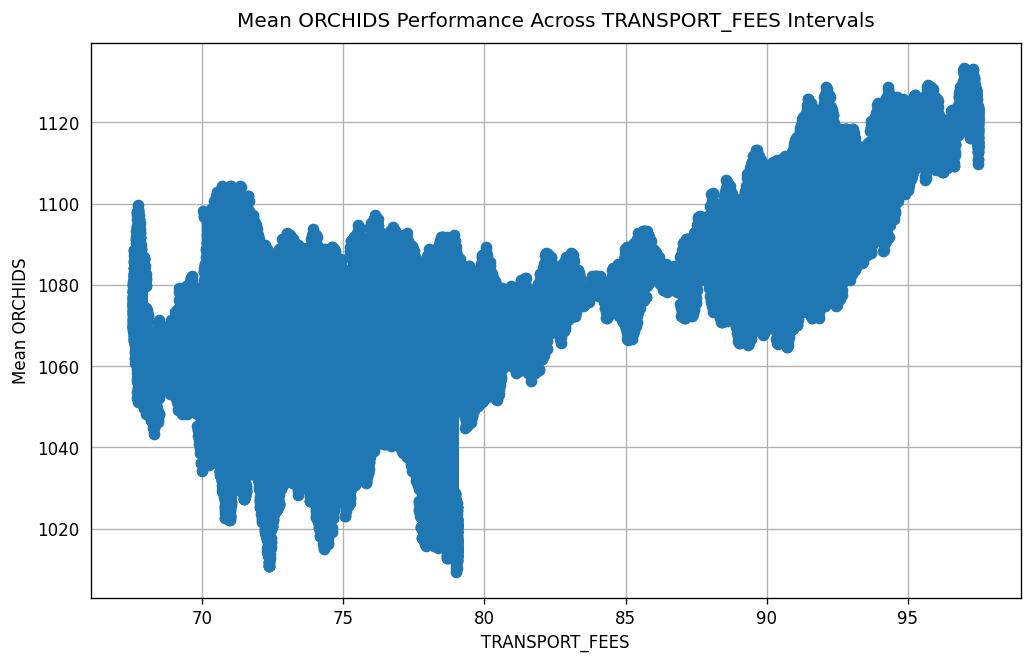

In [68]:

# Aggregate data by taking the mean of ORCHIDS for each unique SUNLIGHT value
fees = df.groupby('TRANSPORT_FEES')['ORCHIDS'].mean()

# Plot aggregated data
plt.figure(figsize=(10, 6))
plt.plot(sunlight_orchid_mean.index, sunlight_orchid_mean.values, marker='o', linestyle='-')
plt.xlabel('TRANSPORT_FEES')
plt.ylabel('Mean ORCHIDS')
plt.title('Mean ORCHIDS Performance Across TRANSPORT_FEES Intervals')
plt.grid(True)
plt.show()

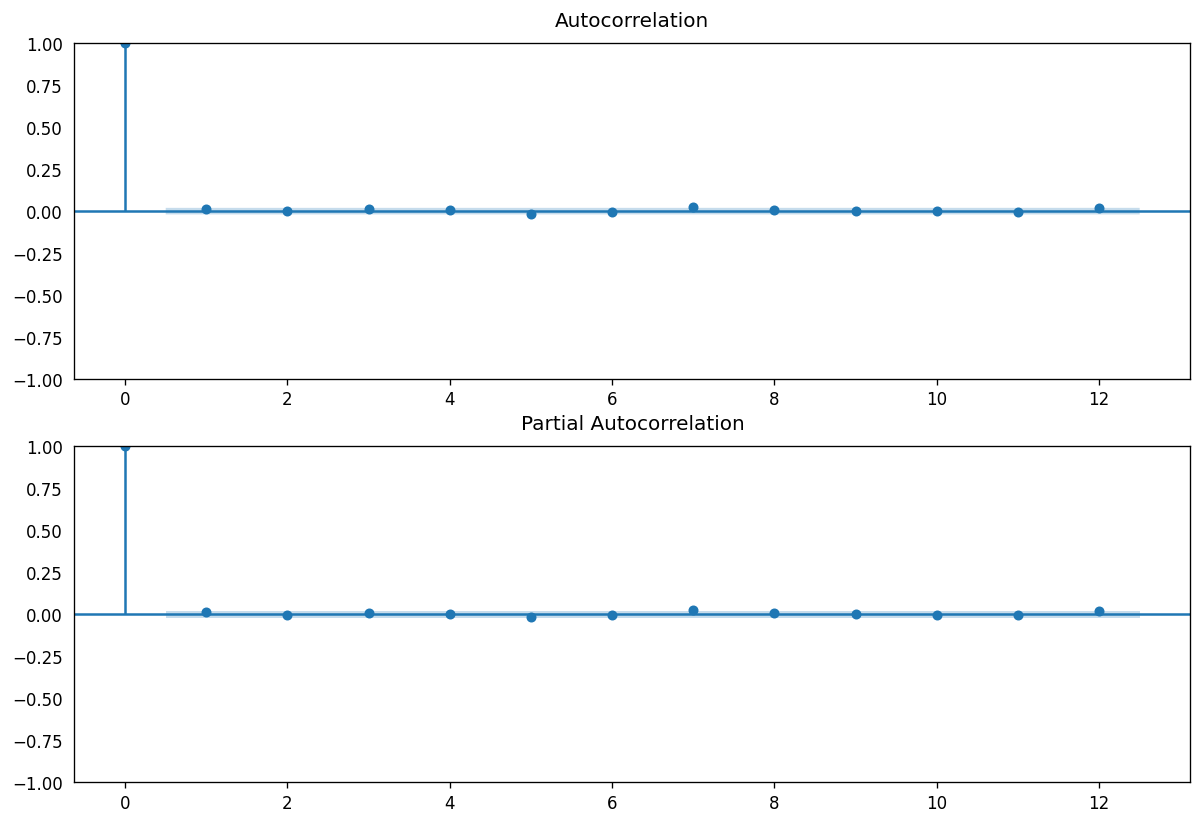

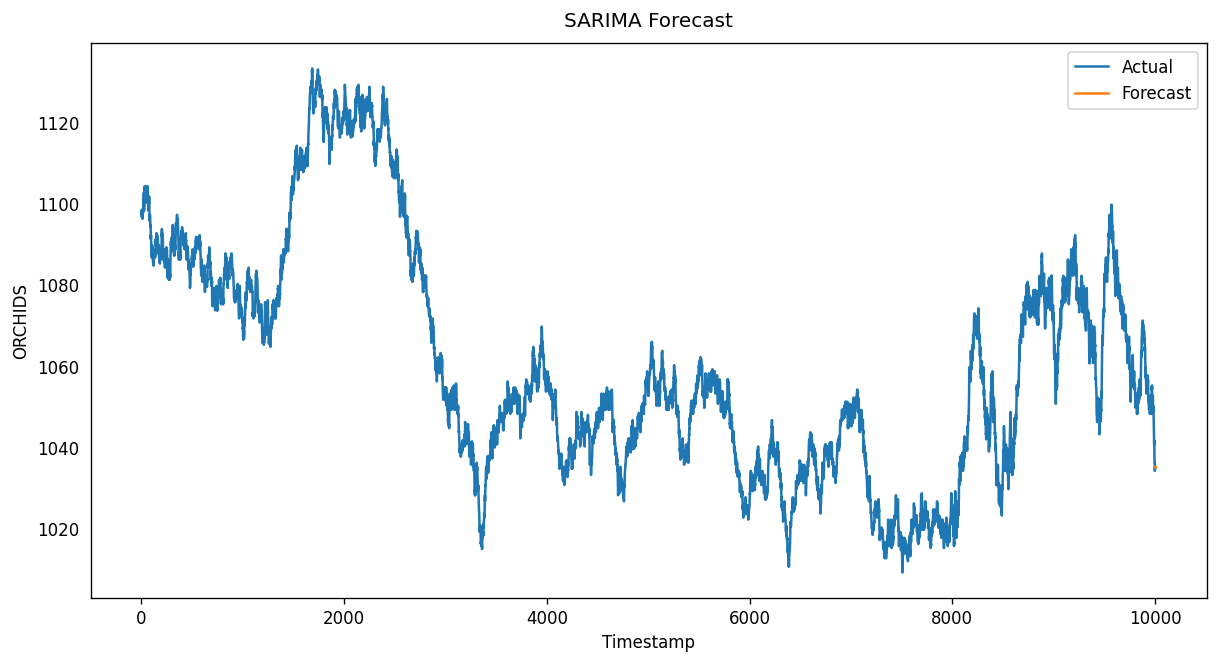

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Select the target variable (e.g., 'ORCHIDS')
target_variable = 'ORCHIDS'

# Identify Seasonality (e.g., monthly)
seasonal_period = 12  # assuming monthly data

# Differencing to make the series stationary
data_diff = df[[target_variable]].diff().dropna()

# Plot ACF and PACF to identify model orders
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data_diff[target_variable], ax=ax[0], lags=seasonal_period)
plot_pacf(data_diff[target_variable], ax=ax[1], lags=seasonal_period)
plt.show()

# Model Selection: Choose orders based on ACF and PACF plots
p, d, q = 1, 1, 1  # ARIMA orders
P, D, Q, s = 1, 1, 1, seasonal_period  # Seasonal orders

# SARIMA Model Fitting
model = SARIMAX(df[target_variable], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Forecasting
forecast = results.forecast(steps=10)  # forecast for the next 10 time points

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[target_variable], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast')
plt.xlabel('Timestamp')
plt.ylabel(target_variable)
plt.title('SARIMA Forecast')
plt.legend()
plt.show()



---

In [70]:
df_all = orchids_df.copy().reset_index()
df_all

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0.0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
1,1.0,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
2,2.0,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
3,3.0,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
4,4.0,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1
...,...,...,...,...,...,...,...,...
29998,29996.0,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1
29999,29997.0,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1
30000,29998.0,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1
30001,29999.0,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,1


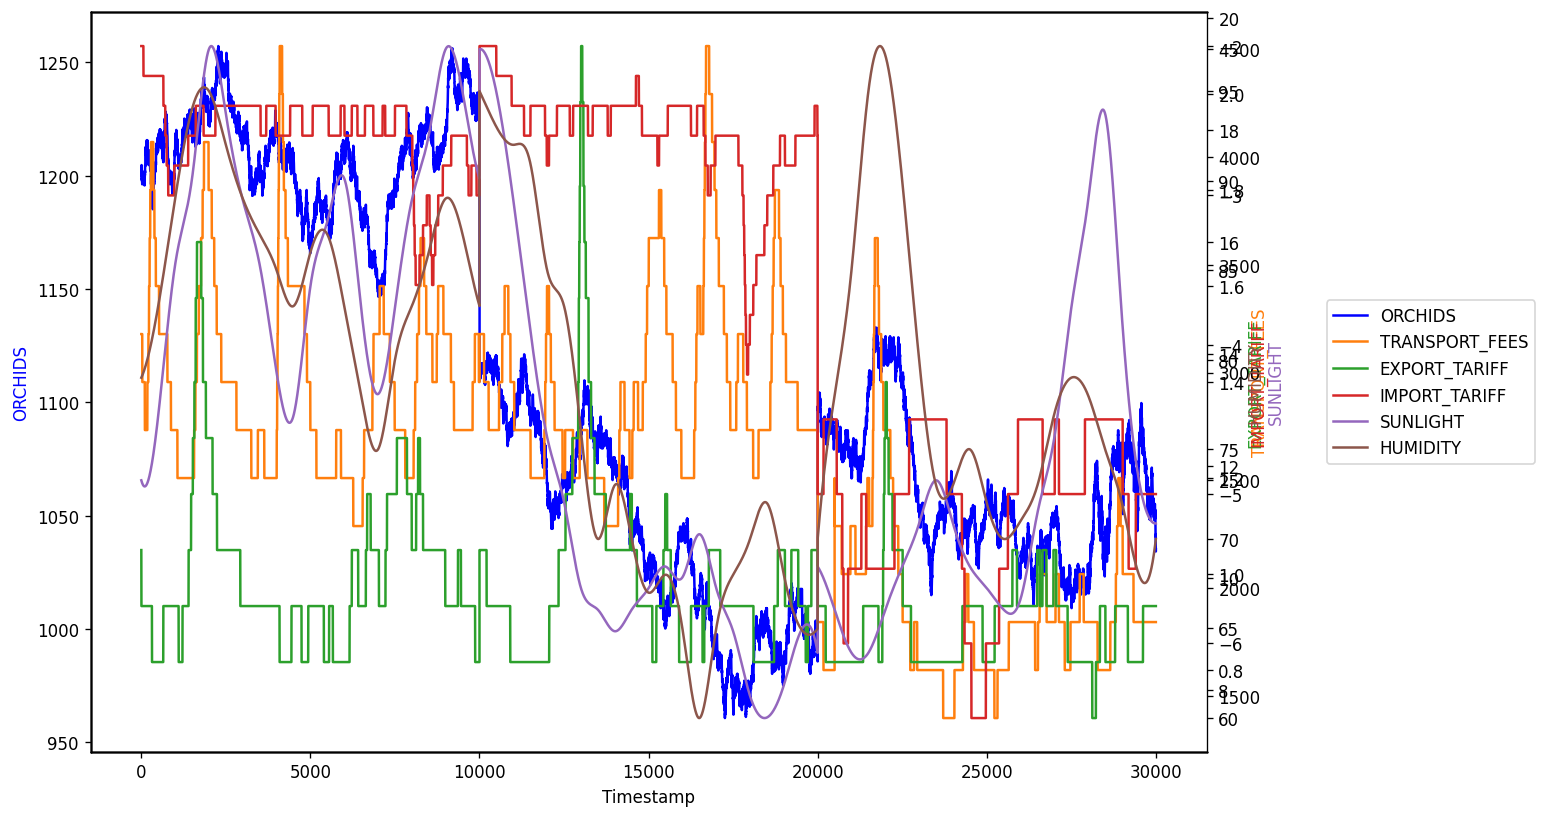

In [71]:
def plot_multiple_variables(df, variables, vlines=None, hlines=None):
    """
    Plot multiple variables from a DataFrame on a single plot with separate y-axes,
    including vertical and horizontal lines.

    Args:
        df (DataFrame): DataFrame containing the data.
        variables (list): List of variable names to plot.
        vlines (list of dicts): List of dictionaries for vertical lines {'x': x_value, 'color': color, 'label': label}
        hlines (list of dicts): List of dictionaries for horizontal lines {'y': y_value, 'color': color, 'label': label, 'variable': variable}
    """
    num_variables = len(variables)
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel(variables[0], color='blue')
    ax1.plot(df['timestamp'], df[variables[0]], color='blue', label=variables[0])
    axes = [ax1]

    for i in range(1, num_variables):
        ax_new = ax1.twinx()
        ax_new.set_ylabel(variables[i], color=f'C{i}')
        ax_new.spines['right'].set_visible(False)
        ax_new.plot(df['timestamp'], df[variables[i]], color=f'C{i}', label=variables[i])
        axes.append(ax_new)

    if vlines:
        for line in vlines:
            ax1.axvline(x=line['x'], color=line['color'], label=line['label'], linestyle='--')

    if hlines:
        for line in hlines:
            target_ax = axes[variables.index(line['variable'])]
            target_ax.axhline(y=line['y'], color=line['color'], label=line['label'], linestyle='--')

    all_lines, all_labels = [], []
    for ax in axes:
        lines, labels = ax.get_legend_handles_labels()
        all_lines.extend(lines)
        all_labels.extend(labels)

    ax1.legend(all_lines, all_labels, loc='center left', bbox_to_anchor=(1.1, 0.5))
    plt.show()

plot_multiple_variables(df_all, ["ORCHIDS", "TRANSPORT_FEES", "EXPORT_TARIFF", "IMPORT_TARIFF", "SUNLIGHT", "HUMIDITY"])


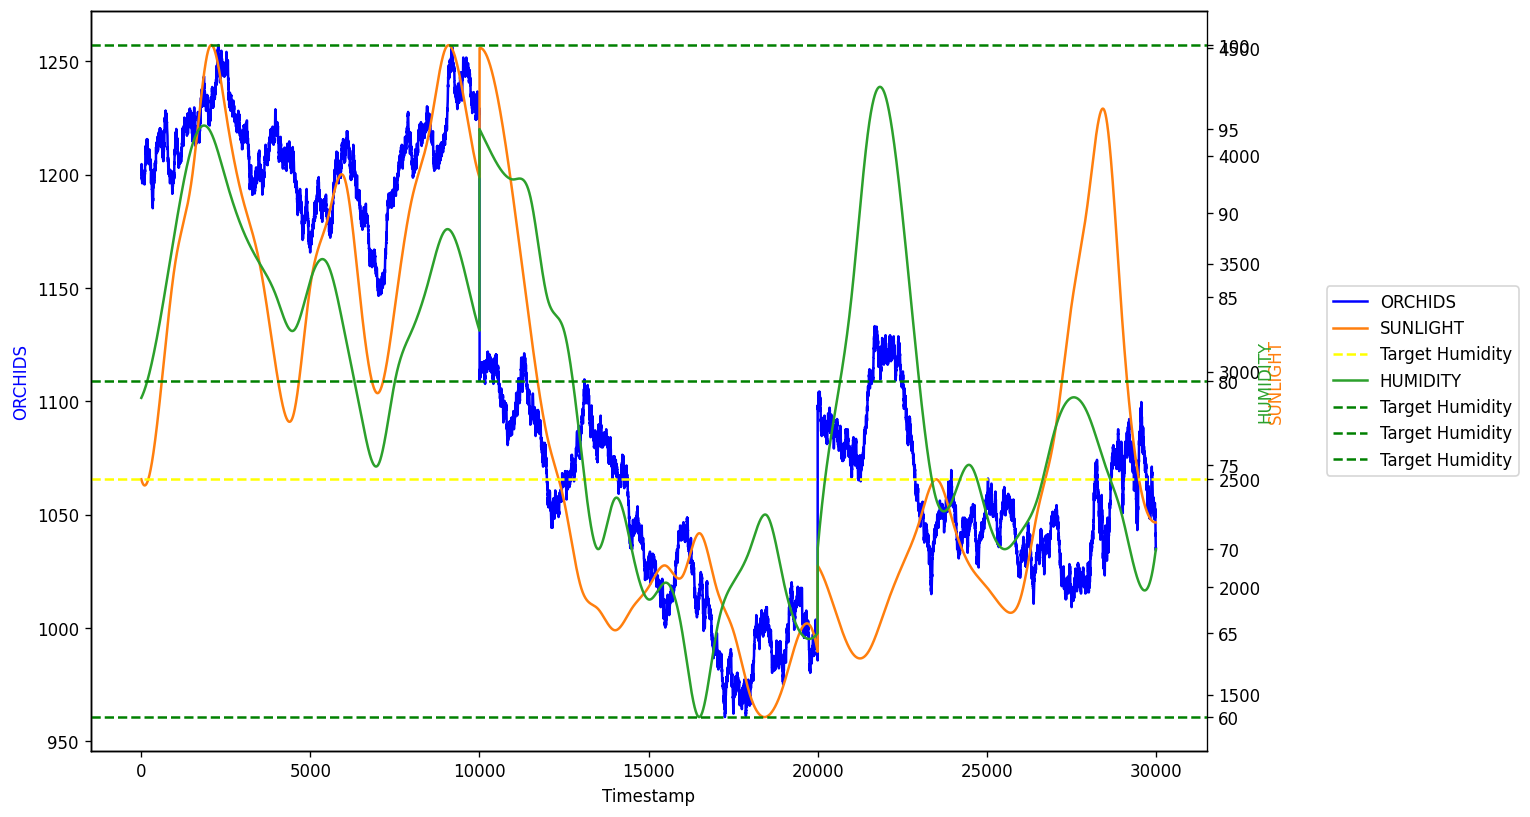

In [72]:
plot_multiple_variables(df_all, ["ORCHIDS", "SUNLIGHT", "HUMIDITY"],
                         hlines=[{'y': 60, 'color': 'green', 'label': 'Target Humidity', 'variable': 'HUMIDITY'},
                                 {'y': 80, 'color': 'green', 'label': 'Target Humidity', 'variable': 'HUMIDITY'},
                                 {'y': 100, 'color': 'green', 'label': 'Target Humidity', 'variable': 'HUMIDITY'},
                                 {'y': 2500, 'color': 'yellow', 'label': 'Target Humidity', 'variable': 'SUNLIGHT'},
                                 ])

In [73]:
df_extra_variables = df_all.copy()
df_extra_variables[""]

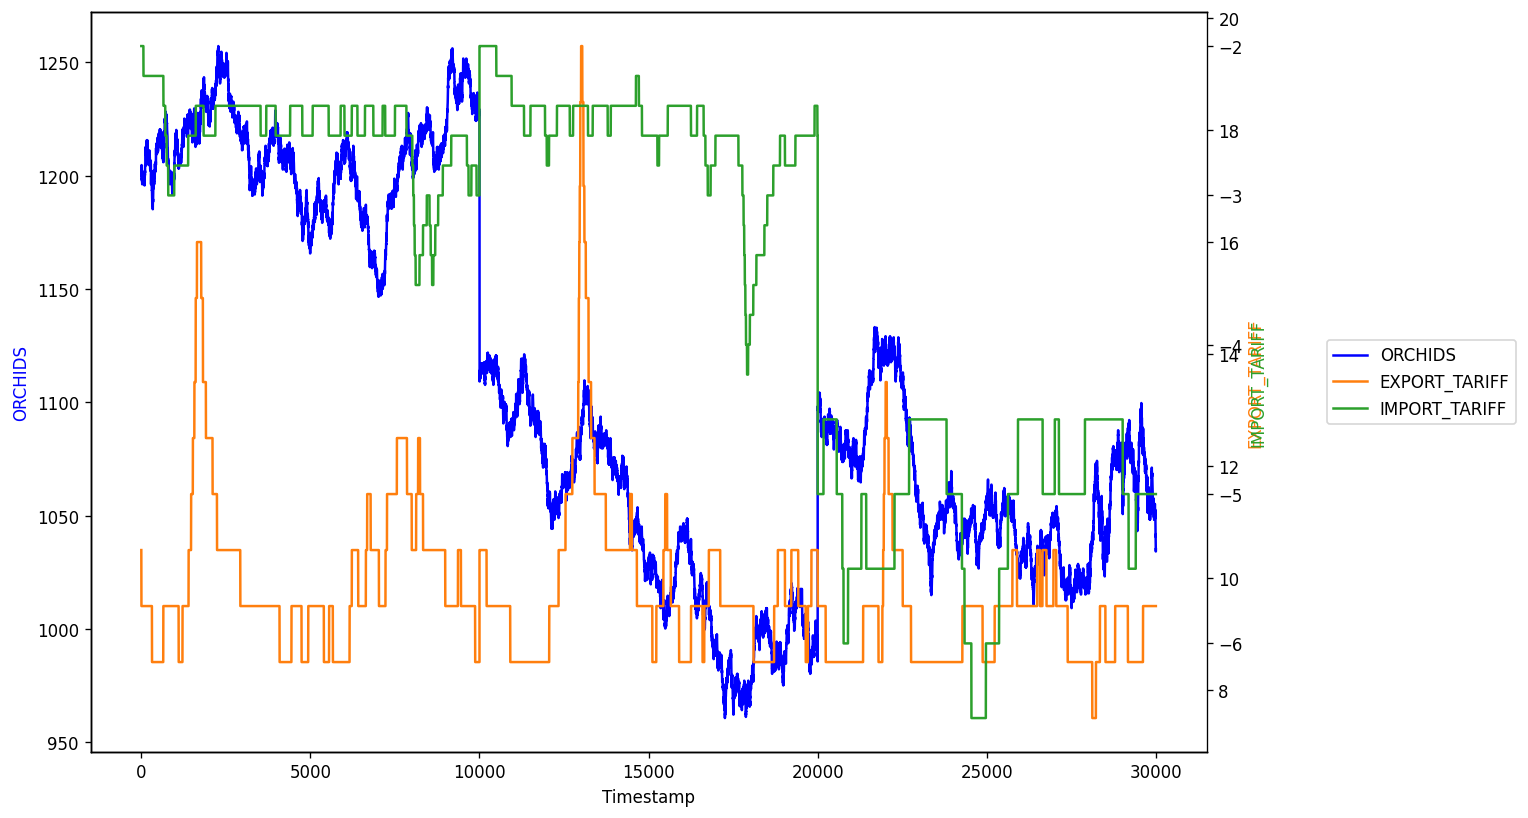

In [74]:
plot_multiple_variables(df_all, ["ORCHIDS", "EXPORT_TARIFF", "IMPORT_TARIFF"])


In [75]:
df_all

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0.0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
1,1.0,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
2,2.0,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
3,3.0,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
4,4.0,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1
...,...,...,...,...,...,...,...,...
29998,29996.0,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1
29999,29997.0,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1
30000,29998.0,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1
30001,29999.0,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,1


In [76]:
df_all["IMPORT_TARIFF"].max()

-2.0

In [77]:
df_all[["HUMIDITY", "SUNLIGHT"]].describe().T

,count,mean,std,min,25%,50%,75%,max
HUMIDITY,30003.0,79.073562,9.366057,59.99958,71.204712,78.57902,86.771817,97.51327
SUNLIGHT,30003.0,2777.073279,912.366591,1397.30490,1973.018900,2498.06620,3619.445200,4513.98630
